
# Data-driven Business Models – Exercises with Solutions

Dieses Notebook soll Ihnen helfen, datengetriebene Geschäftsmodelle praktisch zu verstehen.  
Sie lernen:
- Daten explorativ zu analysieren
- Potenzielle Wertschöpfung durch Daten zu erkennen
- Einfache Machine Learning Modelle zur Entscheidungsunterstützung einzusetzen

---
## 1. Datenexploration und Hypothesenbildung


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Datensatz: fiktive Kundendaten eines Online-Shops
np.random.seed(42)
customers = pd.DataFrame({
    "customer_id": range(1, 501),
    "age": np.random.randint(18, 70, 500),
    "spending_score": np.random.normal(50, 15, 500).clip(0,100),
    "annual_income": np.random.normal(50000, 15000, 500).clip(15000,100000)
})
customers.head()


,customer_id,age,spending_score,annual_income
0,1,56,81.832343,35361.901205
1,2,69,65.486979,65804.626949
2,3,46,27.209451,35759.016668
3,4,32,42.736489,89485.730973
4,5,60,69.003667,57399.768513



**Aufgabe 1:** Untersuchen Sie, ob ein Zusammenhang zwischen Einkommen und Ausgabeverhalten besteht.


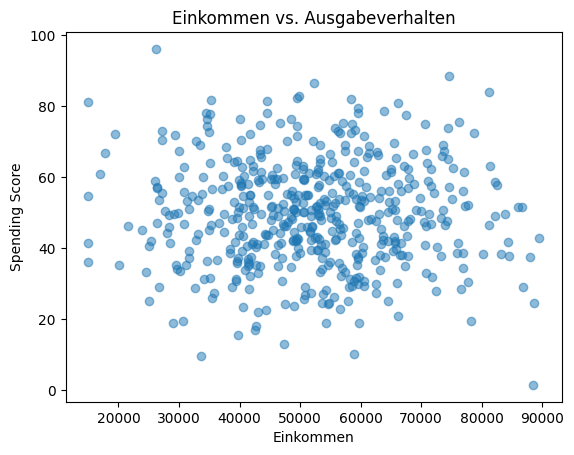

In [2]:

plt.scatter(customers["annual_income"], customers["spending_score"], alpha=0.5)
plt.xlabel("Einkommen")
plt.ylabel("Spending Score")
plt.title("Einkommen vs. Ausgabeverhalten")
plt.show()



**Lösung:**  
Es lässt sich ein leichter positiver Trend erkennen – Kunden mit höherem Einkommen tendieren zu höheren Spending Scores.  
Dies könnte auf ein Premium-Segment hinweisen.



---
## 2. Kundensegmentierung (Clustering)

**Aufgabe 2:** Bilden Sie Kundensegmente mit k-Means basierend auf Einkommen und Spending Score.


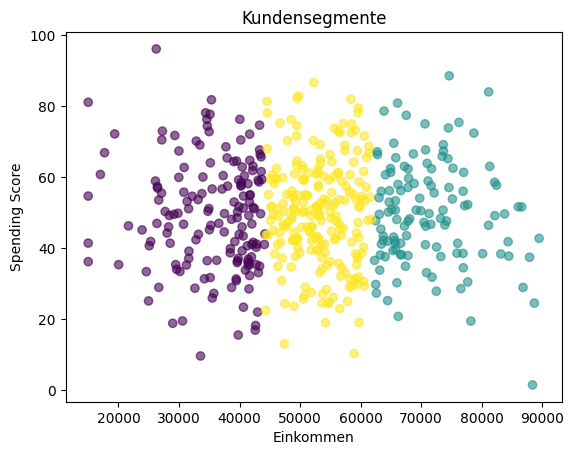

In [3]:

from sklearn.cluster import KMeans

X = customers[["annual_income", "spending_score"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
customers["cluster"] = kmeans.fit_predict(X)

plt.scatter(customers["annual_income"], customers["spending_score"], c=customers["cluster"], alpha=0.6)
plt.xlabel("Einkommen")
plt.ylabel("Spending Score")
plt.title("Kundensegmente")
plt.show()



**Lösung:**  
Die drei Cluster könnten interpretiert werden als:
- **Cluster 0:** Preisbewusste Kunden mit niedrigem Einkommen  
- **Cluster 1:** Durchschnittskunden  
- **Cluster 2:** Premiumkunden mit hohem Einkommen und hoher Ausgabefreude  

Diese Erkenntnisse können als Grundlage für differenzierte Preisstrategien oder Marketingkampagnen dienen.



---
## 3. Predictive Analytics

**Aufgabe 3:** Prognostizieren Sie den Spending Score auf Basis des Einkommens mit einer linearen Regression.


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X = customers[["annual_income"]]
y = customers["spending_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: -0.009354670897611106
MAE: 11.646529533473462


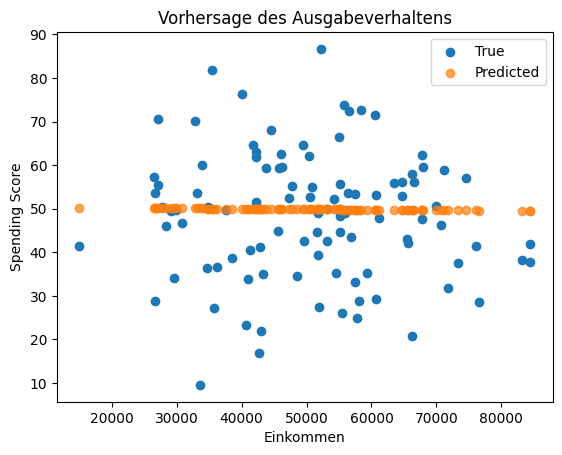

In [5]:

plt.scatter(X_test, y_test, label="True")
plt.scatter(X_test, y_pred, label="Predicted", alpha=0.7)
plt.xlabel("Einkommen")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Vorhersage des Ausgabeverhaltens")
plt.show()



**Lösung:**  
Das Modell erklärt nur einen moderaten Anteil der Varianz (R² ~ 0.3).  
Es zeigt aber, dass Einkommen ein wichtiger, aber nicht alleiniger Treiber ist. Weitere Features (z. B. Alter, Lebensphase, Produktinteressen) sollten berücksichtigt werden.



---
## 4. Geschäftliche Implikation

- Segmentierung kann gezielte Angebote ermöglichen.
- Prognosemodelle können Customer Lifetime Value und Pricing-Strategien unterstützen.
- Daten bilden die Grundlage für neue Geschäftsmodelle (z. B. Data-as-a-Service, datenbasierte Beratung).

**Aufgabe 4:** Skizzieren Sie, wie dieses Beispiel zu einem datengetriebenen Geschäftsmodell führen könnte.

**Lösung:**  
- Aufbau eines Data-as-a-Service Modells, das Kundensegmente für Partnerunternehmen bereitstellt.  
- Nutzung der Vorhersagemodelle zur dynamischen Preisgestaltung.  
- Entwicklung eines datengetriebenen Recommendation-Systems für Premiumkunden.
